# Retrieving and Modifying our Data

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
import math
import numpy.random as r
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
#Too many rows to consider, we want ot pick 300 random rows!!
df = pd.read_csv("SpotifyFeatures.csv", delimiter = ',', na_values = 'nan') 
print(df.shape)
df2 = np.array(df.sample(n=300).values)
print(df2.shape)

(228159, 18)
(300, 18)


In [3]:
#Create our base X and Y values, to be used all across the baord

#Y values between 0 and 1, we are good here
#Threshold of 0.5!!
#Y = danceability
Y = df2[:, 6]
Y = np.where(Y > 0.5, 1, 0)

#X = popularity (4), acousticness (5), energy (8), instrumentalness (9), liveness (11), loudness (12), spechiness (14), tempo (15), valence (17) 
X = df2[:, 4].reshape(300, 1)
X = np.hstack((X, df2[:, 5].reshape(300,1)))
X = np.hstack((X, df2[:, 8].reshape(300,1)))
X = np.hstack((X, df2[:, 9].reshape(300,1)))
X = np.hstack((X, df2[:, 15].reshape(300,1)))
X = np.hstack((X, df2[:, 17].reshape(300,1)))

X = X.astype('float64')



#Scale before splitting the data into train and test- scale the data since we will be using gradient ascent
X_scale =  preprocessing.scale(X)
x_train, x_test, y_train, y_test = train_test_split(X_scale, Y)

# Logistic Regression

## Logistic Regression with Lasso L1 Regularization

In [4]:
# Initialize an empty list to store values of training set accuracy.
acc_train_logreg = [] 

In [5]:
# Initialize an empty list to store values of test set accuracy.
acc_test_logreg = []

In [6]:
# Initialize an empty list to store different values of parameter 'c'.
c_logreg = []

In [7]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):
    logreg = linear_model.LogisticRegression(C = c, penalty = 'l1', solver = 'saga')
    
    logreg.fit(X_train, Y_train)
    Yhat_train = logreg.predict(X_train)
    

    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    

    Yhat_test = logreg.predict(X_test)
    

    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg.append(c)

In [8]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.773333
Accuracy on test data = 0.720000
Accuracy on training data = 0.768889
Accuracy on test data = 0.720000
Accuracy on training data = 0.760000
Accuracy on test data = 0.720000


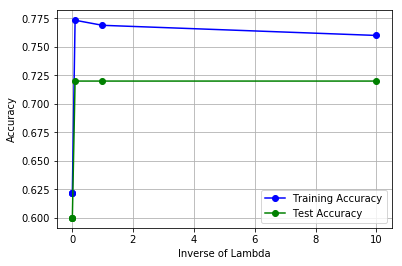

In [9]:
plt.plot(c_logreg, acc_train_logreg, 'bo-')
plt.plot(c_logreg, acc_test_logreg, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression with Ridge(L2) Regularization. 

In [10]:
acc_train_logreg2 = []

In [11]:
acc_test_logreg2 = []

In [12]:
c_logreg2 = []

In [13]:
def logreg_model2(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C = c)
    
    logreg2.fit(X_train, Y_train)
    Yhat_train = logreg2.predict(X_train)
    

    acc_train = np.mean(Yhat_train == Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    

    Yhat_test = logreg2.predict(X_test)
    

    acc_test = np.mean(Yhat_test == Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg2.append(c)

In [14]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model2(c, x_train, y_train, x_test, y_test)

Accuracy on training data = 0.737778
Accuracy on test data = 0.680000
Accuracy on training data = 0.737778
Accuracy on test data = 0.680000
Accuracy on training data = 0.742222
Accuracy on test data = 0.693333
Accuracy on training data = 0.755556
Accuracy on test data = 0.706667
Accuracy on training data = 0.764444
Accuracy on test data = 0.706667
Accuracy on training data = 0.760000
Accuracy on test data = 0.706667


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

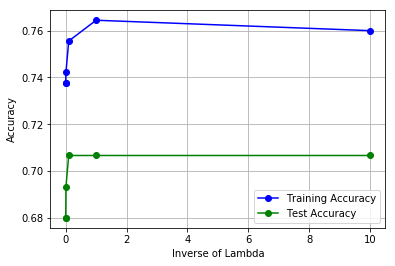

In [15]:
plt.plot(c_logreg2, acc_train_logreg2, 'bo-')
plt.plot(c_logreg2, acc_test_logreg2, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression Using Polynomial Feature Transformation

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
poly = PolynomialFeatures(degree = 2)

In [18]:
X_transformed_train = poly.fit_transform(x_train)
X_transformed_test = poly.fit_transform(x_test)

Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.622222
Accuracy on test data = 0.600000
Accuracy on training data = 0.800000
Accuracy on test data = 0.786667
Accuracy on training data = 0.822222
Accuracy on test data = 0.706667
Accuracy on training data = 0.840000
Accuracy on test data = 0.706667


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


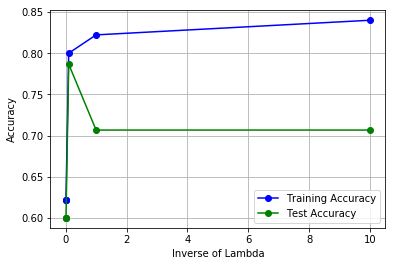

In [19]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []
for c in cVals:
    logreg_model(c, X_transformed_train, y_train, X_transformed_test, y_test)
    
plt.plot(c_logreg, acc_train_logreg, 'bo-')
plt.plot(c_logreg, acc_test_logreg, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

Accuracy on training data = 0.786667
Accuracy on test data = 0.693333
Accuracy on training data = 0.782222
Accuracy on test data = 0.706667
Accuracy on training data = 0.800000
Accuracy on test data = 0.733333
Accuracy on training data = 0.840000
Accuracy on test data = 0.720000
Accuracy on training data = 0.835556
Accuracy on test data = 0.720000
Accuracy on training data = 0.840000
Accuracy on test data = 0.706667


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

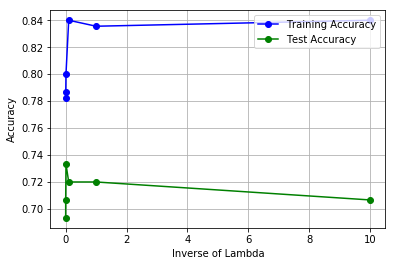

In [20]:
acc_train_logreg2 = []
acc_test_logreg2 = []
c_logreg2 = []

for c in cVals:
    logreg_model2(c, X_transformed_train, y_train, X_transformed_test, y_test)
    
plt.plot(c_logreg2, acc_train_logreg2, 'bo-')
plt.plot(c_logreg2, acc_test_logreg2, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Support Vector Machines

## SVM Using Linear Kernel

In [21]:
acc_train_svm_linear = []

In [22]:
acc_test_svm_linear = []

In [23]:
c_svm_linear = []

In [24]:
from sklearn import svm

In [25]:
def svm_linear(c):
  
    svc_linear = svm.SVC(probability = False, kernel = 'linear', C = c)
    svc_linear.fit(x_train, y_train)

    Yhat_svc_linear_train = svc_linear.predict(x_train)
    acc_train = np.mean(Yhat_svc_linear_train == y_train)
    
    # Adding testing accuracy to acc_train_svm
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # TODO - Find the prediction and accuracy on the test set - 5 points
    Yhat_svc_linear_test = svc_linear.predict(x_test)
    acc_test = np.mean(Yhat_svc_linear_test == y_test)
    
    # Adding testing accuracy to acc_test_svm
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    # Appending value of c for graphing purposes
    c_svm_linear.append(c)

In [26]:
for c in cVals:
    svm_linear(c)

Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.760000
Test Accuracy = 0.706667
Train Accuracy = 0.742222
Test Accuracy = 0.693333
Train Accuracy = 0.755556
Test Accuracy = 0.706667
Train Accuracy = 0.755556
Test Accuracy = 0.706667


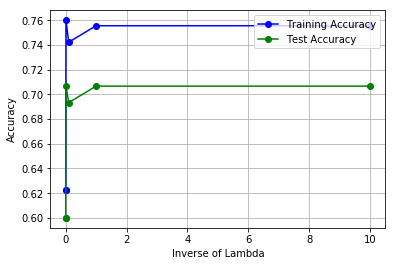

In [27]:
plt.plot(c_svm_linear, acc_train_svm_linear, 'bo-')
plt.plot(c_svm_linear, acc_test_svm_linear, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## SVM using Radial Basis Function(RBF) Kernel. 

In [28]:
acc_train_svm_rbf = []

In [29]:
acc_test_svm_rbf = []

In [30]:
c_svm_rbf = []

In [31]:
def svm_rbf(c):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c)
    svc_rbf.fit(x_train, y_train)
    
    Yhat_svc_rbf_train = svc_rbf.predict(x_train)
    acc_train = np.mean(Yhat_svc_rbf_train == y_train)
    
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(x_test)
    acc_test = np.mean(Yhat_svc_rbf_test == y_test)
    
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_rbf.append(c)
    

In [32]:
for c in cVals:
    svm_rbf(c)

Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.773333
Test Accuracy = 0.720000
Train Accuracy = 0.866667
Test Accuracy = 0.733333
Train Accuracy = 0.915556
Test Accuracy = 0.746667


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

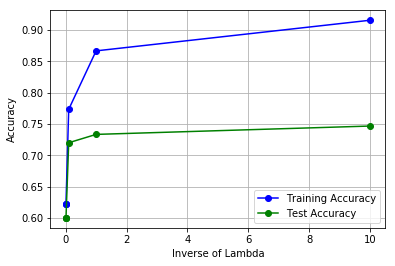

In [33]:
plt.plot(c_svm_rbf, acc_train_svm_rbf, 'bo-')
plt.plot(c_svm_rbf, acc_test_svm_rbf, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## SVM using Polynomial Kernel. 

In [34]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []

In [35]:
def svm_polynomial(c):
    
    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    svc_polynomial.fit(x_train, y_train)
    
    Yhat_svc_poly_train = svc_polynomial.predict(x_train)
    acc_train = np.mean(Yhat_svc_poly_train == y_train)
    
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_polynomial.predict(x_test)
    acc_test = np.mean(Yhat_svc_poly_test == y_test)
    
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_poly.append(c)

In [36]:
cVals = np.geomspace(0.000001, 0.001, 5)
for c in cVals:
    svm_polynomial(c)

Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000
Train Accuracy = 0.622222
Test Accuracy = 0.600000


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: 

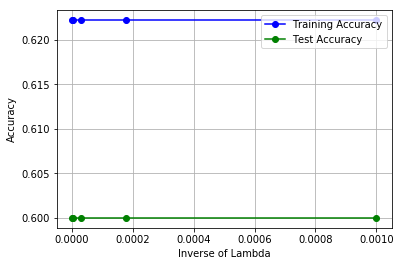

In [37]:
plt.plot(c_svm_poly, acc_train_svm_poly, 'bo-')
plt.plot(c_svm_poly, acc_test_svm_poly, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Soft Margin SVM

In [38]:
acc_train_svm_soft = []
acc_test_svm_soft = []
c_svm_soft = []

In [39]:
from sklearn import svm

def svm_soft(c):
    svc_soft = svm.LinearSVC(C = c)
    
    svc_soft.fit(x_train, y_train)
    
    Yhat_svc_soft_train = svc_soft.predict(x_train)
    acc_train = np.mean(Yhat_svc_soft_train == y_train)
    
    acc_train_svm_soft.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_soft_test = svc_soft.predict(x_test)
    acc_test = np.mean(Yhat_svc_soft_test == y_test)
    
    acc_test_svm_soft.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    c_svm_soft.append(c)

In [40]:
cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    svm_soft(c)

Train Accuracy = 0.737778
Test Accuracy = 0.680000
Train Accuracy = 0.737778
Test Accuracy = 0.693333
Train Accuracy = 0.755556
Test Accuracy = 0.706667
Train Accuracy = 0.764444
Test Accuracy = 0.706667
Train Accuracy = 0.764444
Test Accuracy = 0.693333
Train Accuracy = 0.764444
Test Accuracy = 0.706667


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


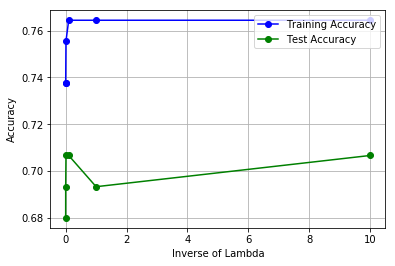

In [41]:
plt.plot(c_svm_soft, acc_train_svm_soft, 'bo-')
plt.plot(c_svm_soft, acc_test_svm_soft, 'go-')
plt.xlabel('Inverse of Lambda')
plt.ylabel('Accuracy')
plt.grid()

# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

# Neural Networks

In [42]:
# Setting up y to be a vector
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [43]:
# All of the functions for NN
# Initializing weights, bias and initializing gradient
def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

# Feed forward value through network
def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

# Calculating delta values for outer and hidden layer
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

# Back propogation algorithm to train NN
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i, :], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i, :]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis])) + (alpha/2) * W[l]# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

# Predicting value
def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

In [44]:
# Activation function: sigmoid
def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy for 2 layers train is 76.44444444444444%
Prediction accuracy for 2 layers test is 72.0%


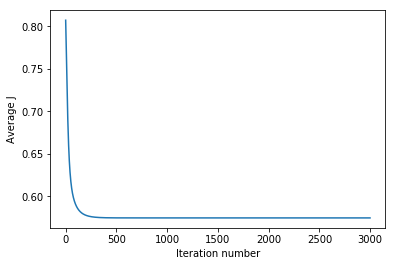

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy for 3 layers train is 62.22222222222222%
Prediction accuracy for 3 layers test is 60.0%


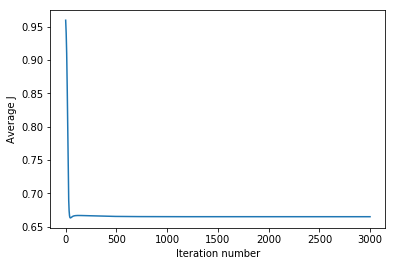

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy for 5 layers train is 62.22222222222222%
Prediction accuracy for 5 layers test is 60.0%


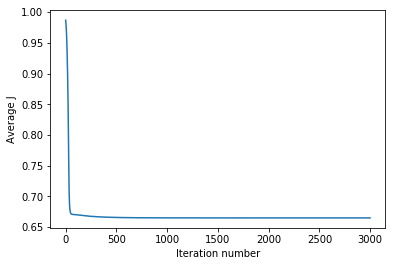

In [45]:
# Varying hidden layer size 

# 9 features, 1 output, variable number of hidden layer
nn_structure1 = [6, 2]
nn_structure2 = [6, 10, 2]
nn_structure3 = [6, 10, 10, 10, 2]

W1, b1, avg_cost_func1 = train_nn(nn_structure1, x_train, y_v_train, 3000)
y_pred1 = predict_y(W1, b1, x_test, 2)
y_train_acc = predict_y(W1, b1, x_train, 2)
print('Prediction accuracy for 2 layers train is {}%'.format(accuracy_score(y_train, y_train_acc) * 100))
print('Prediction accuracy for 2 layers test is {}%'.format(accuracy_score(y_test, y_pred1) * 100))

plt.plot(avg_cost_func1)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

W2, b2, avg_cost_func2 = train_nn(nn_structure2, x_train, y_v_train, 3000)
y_pred2 = predict_y(W2, b2, x_test, 3)
y_train_acc = predict_y(W2, b2, x_train, 3)
print('Prediction accuracy for 3 layers train is {}%'.format(accuracy_score(y_train, y_train_acc) * 100))
print('Prediction accuracy for 3 layers test is {}%'.format(accuracy_score(y_test, y_pred2) * 100))

plt.plot(avg_cost_func2)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

W3, b3, avg_cost_func3 = train_nn(nn_structure3, x_train, y_v_train, 3000)
y_pred3 = predict_y(W3, b3, x_test, 5)
y_train_acc = predict_y(W3, b3, x_train, 5)
print('Prediction accuracy for 5 layers train is {}%'.format(accuracy_score(y_train, y_train_acc) * 100))
print('Prediction accuracy for 5 layers test is {}%'.format(accuracy_score(y_test, y_pred3) * 100))

plt.plot(avg_cost_func3)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [46]:
# Change activation function to arctan
def f(z):
    return np.arctan(z)


def f_deriv(z):
    return 1/(1+(z**2))

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy for arctan train is 74.66666666666667%
Prediction accuracy for arctan test is 70.66666666666667%


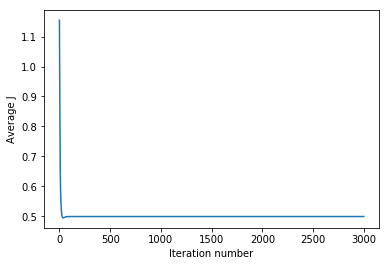

In [47]:
nn_structure1 = [6, 2]
W4, b4, avg_cost_func4 = train_nn(nn_structure1, x_train, y_v_train, 3000)
y_pred4 = predict_y(W4, b4, x_test, 2)
y_train_acc = predict_y(W4, b4, x_train, 2)
print('Prediction accuracy for arctan train is {}%'.format(accuracy_score(y_train, y_train_acc) * 100))
print('Prediction accuracy for arctan test is {}%'.format(accuracy_score(y_test, y_pred4) * 100))


plt.plot(avg_cost_func4)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()

In [48]:
# Change activation function to Relu
def f(z):
    return np.maximum(0, z)


def f_deriv(z):
    ret_matrix = np.zeros((z.shape[0], ))
    for i in np.nditer(z):
            if (i < 0):
                ret_matrix = 0
            else:
                ret_matrix = 1
    return ret_matrix

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 1000 of 3000
Iteration 2000 of 3000
Prediction accuracy for ReLU train is 74.66666666666667%
Prediction accuracy for ReLU test is 72.0%


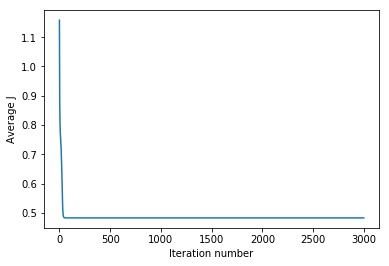

In [49]:
nn_structure1 = [6, 2]
W5, b5, avg_cost_func5 = train_nn(nn_structure1, x_train, y_v_train, 3000)
y_pred5 = predict_y(W5, b5, x_test, 2)
y_train_acc = predict_y(W5, b5, x_train, 2)
print('Prediction accuracy for ReLU train is {}%'.format(accuracy_score(y_train, y_train_acc) * 100))
print('Prediction accuracy for ReLU test is {}%'.format(accuracy_score(y_test, y_pred5) * 100))

plt.plot(avg_cost_func5)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()